# Predicting the employee count of a firm using predictive analytics

This project aims at predicting the number of employees each firm has using predictive analytics to clean, visualize and explore key features that can accurately predict the number of employees in a firm.

## Table of contents

1. Data Definition
2. Target Definition
3. Feature Engineering
4. Feature Selection
5. Machine Learning
6. Conclusion

## 1. Data Definition

In this section we aim to form an initial understanding of the dataset under study.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_excel('Data.xlsx')

data.head()

,Company Name,GICS Industry Name,GICS Sector Name,Company Market Cap,Total Revenue,Bank Total Revenue,Income Avail to Cmn Shareholders Incl Extra,Total Operating Expense,Total Interest Expenses,Capital Expenditures,Total Cash Dividends Paid,"Total Receivables, Net","Non-Interest Expense, Bank",Country of Headquarters,Number of Employees
0,Suzano Papel e Celulose SA,Paper & Forest Products,Materials,7.412296e+09,3.176471e+09,NaN,5.457060e+08,2.192834e+09,NaN,-5.375146e+08,-1.722677e+08,8.280034e+08,NaN,Brazil,0.0
1,SA Corporate Real Estate Fund Managers Pty Ltd,Equity Real Estate Investment Trusts (REITs),Real Estate,1.032361e+09,1.370199e+08,NaN,1.806121e+08,6.943588e+07,NaN,-8.396334e+07,NaN,4.796163e+07,NaN,South Africa,0.0
2,I&M Holdings Ltd,Banks,Financials,4.897201e+08,2.874332e+08,NaN,7.115000e+07,1.881930e+08,NaN,-9.199267e+06,-1.341476e+07,4.887487e+06,NaN,Kenya,0.0
3,Hospitality Property Fund Ltd,Equity Real Estate Investment Trusts (REITs),Real Estate,5.592327e+08,3.716946e+07,NaN,4.057960e+07,4.088094e+06,NaN,-1.140115e+04,NaN,8.579104e+06,NaN,South Africa,0.0
4,Grit Real Estate Income Group Ltd,Real Estate Management & Development,Real Estate,2.806123e+08,2.546171e+07,NaN,1.773169e+07,2.084180e+06,NaN,-1.022260e+06,NaN,2.635535e+07,NaN,Mauritius,0.0


### 1.1 DataFrame Inspection

In [2]:
# Inspect fields in the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23036 entries, 0 to 23035
Data columns (total 15 columns):
Company Name                                   23036 non-null object
GICS Industry Name                             22487 non-null object
GICS Sector Name                               22487 non-null object
Company Market Cap                             23036 non-null float64
Total Revenue                                  21830 non-null float64
Bank Total Revenue                             1206 non-null float64
Income Avail to Cmn Shareholders Incl Extra    21979 non-null float64
Total Operating Expense                        20389 non-null float64
Total Interest Expenses                        1187 non-null float64
Capital Expenditures                           20146 non-null float64
Total Cash Dividends Paid                      16086 non-null float64
Total Receivables, Net                         19894 non-null float64
Non-Interest Expense, Bank                     1202 non-

**Deduction:** The datatypes of the columns are rational, except the `GICS Industry Name`,
`GICS Sector Name` and `Country of Headquarters` which can be made categorical.

PS: `Number of Employees` can be made int, but will have to be converted back later.

In [3]:
data.isnull().sum()

Company Name                                       0
GICS Industry Name                               549
GICS Sector Name                                 549
Company Market Cap                                 0
Total Revenue                                   1206
Bank Total Revenue                             21830
Income Avail to Cmn Shareholders Incl Extra     1057
Total Operating Expense                         2647
Total Interest Expenses                        21849
Capital Expenditures                            2890
Total Cash Dividends Paid                       6950
Total Receivables, Net                          3142
Non-Interest Expense, Bank                     21834
Country of Headquarters                           89
Number of Employees                             1623
dtype: int64

**Deduction:** Except for the `Company Name` and the `Company Market Cap`,
all other columns have null values.

For the three categorical columns, the null values can represent the
`uncategorized` category.

In [4]:
data.duplicated().any()

False

**Deduction:** There are no duplicate rows. No action required.

Inspect statistics of the numerical columns.

In [5]:
data.describe()

,Company Market Cap,Total Revenue,Bank Total Revenue,Income Avail to Cmn Shareholders Incl Extra,Total Operating Expense,Total Interest Expenses,Capital Expenditures,Total Cash Dividends Paid,"Total Receivables, Net","Non-Interest Expense, Bank",Number of Employees
count,2.303600e+04,2.183000e+04,1.206000e+03,2.197900e+04,2.038900e+04,1.187000e+03,2.014600e+04,1.608600e+04,1.989400e+04,1.202000e+03,2.141300e+04
mean,3.637825e+09,2.235098e+09,2.754447e+09,1.727163e+08,2.058677e+09,9.756055e+08,-1.690046e+08,-1.081104e+08,4.335163e+08,-1.629290e+09,7.518363e+03
std,1.815642e+10,1.038044e+10,9.767938e+09,1.167751e+09,9.868514e+09,3.566161e+09,9.381015e+08,5.149964e+08,2.252319e+09,6.157328e+09,3.094211e+04
min,1.000042e+08,-1.094585e+09,-5.325111e+07,-1.652500e+10,-1.248919e+10,-1.415055e+06,-4.105139e+10,-1.300100e+10,-1.204408e+07,-8.804597e+10,0.000000e+00
25%,2.399376e+08,9.261503e+07,1.097285e+08,4.940164e+06,7.477754e+07,1.635200e+07,-6.481674e+07,-4.515479e+07,1.660406e+07,-6.608230e+08,3.800000e+02
50%,6.049919e+08,2.935939e+08,3.519513e+08,2.018438e+07,2.580658e+08,8.182704e+07,-1.548620e+07,-1.155579e+07,6.124523e+07,-2.047831e+08,1.336000e+03
75%,1.874397e+09,1.053964e+09,1.136936e+09,7.851767e+07,9.517000e+08,3.700778e+08,-3.673371e+06,-3.515740e+06,2.060683e+08,-6.429427e+07,4.525000e+03
max,8.940918e+11,5.003430e+11,1.035472e+11,5.071479e+10,4.830420e+11,4.603687e+10,0.000000e+00,6.360519e+06,8.788600e+10,2.256150e+06,2.300000e+06


After inspecting the dataframe the following conclusions can be made:
- The dataframe has 15 features/attributes and 23,036 examples/rows
- We have two features that are categorical in nature, two features that are nominal and the rest are numeric.
- We have 13 features that have null values which would require some amount of cleaning.
- We have no duplicated data.
- A fundamental table with the summary statistics has been generated as a point of quick reference when constructing visualizations.

## 2. Target definition

The target of key interest in this project is the feature - 'Number of Employees'

The number of employees is a continous numerical column that can be predicted using a regressions based machine learning algorithm

## 3. Feature Engineering

The aim of the section is to handle a wide array of problems that the raw dataset comes with such as:

- Dealing with missing values
- Dealing with outliers
- Renaming the columns
- Ensuring the columns have the right data types

**Rename Columns**

Since the column names are cogent, they are only converted
to `snake_case` for convenience when used with pandas.

In [6]:
import re


# Construct the mapping from old column names to new column names
new_columns = dict()

for column in data.columns:
    
    new_column = re.sub(r'(,?\s|\-)', '_', column.lower())
    new_columns[column] = new_column
    
# Other changes
new_columns['Income Avail to Cmn Shareholders Incl Extra'] = 'shareholder_income'

# Keep an inverse transformation for conversion back to original name
old_columns = { v: k for k, v in new_columns.items() }

# Rename columns
data.rename(columns=new_columns, inplace=True)

data.head()

,company_name,gics_industry_name,gics_sector_name,company_market_cap,total_revenue,bank_total_revenue,shareholder_income,total_operating_expense,total_interest_expenses,capital_expenditures,total_cash_dividends_paid,total_receivables_net,non_interest_expense_bank,country_of_headquarters,number_of_employees
0,Suzano Papel e Celulose SA,Paper & Forest Products,Materials,7.412296e+09,3.176471e+09,NaN,5.457060e+08,2.192834e+09,NaN,-5.375146e+08,-1.722677e+08,8.280034e+08,NaN,Brazil,0.0
1,SA Corporate Real Estate Fund Managers Pty Ltd,Equity Real Estate Investment Trusts (REITs),Real Estate,1.032361e+09,1.370199e+08,NaN,1.806121e+08,6.943588e+07,NaN,-8.396334e+07,NaN,4.796163e+07,NaN,South Africa,0.0
2,I&M Holdings Ltd,Banks,Financials,4.897201e+08,2.874332e+08,NaN,7.115000e+07,1.881930e+08,NaN,-9.199267e+06,-1.341476e+07,4.887487e+06,NaN,Kenya,0.0
3,Hospitality Property Fund Ltd,Equity Real Estate Investment Trusts (REITs),Real Estate,5.592327e+08,3.716946e+07,NaN,4.057960e+07,4.088094e+06,NaN,-1.140115e+04,NaN,8.579104e+06,NaN,South Africa,0.0
4,Grit Real Estate Income Group Ltd,Real Estate Management & Development,Real Estate,2.806123e+08,2.546171e+07,NaN,1.773169e+07,2.084180e+06,NaN,-1.022260e+06,NaN,2.635535e+07,NaN,Mauritius,0.0


**Change column datatypes**

In [7]:
data['gics_industry_name'] = data['gics_industry_name'].astype('category')
data['gics_sector_name'] = data['gics_sector_name'].astype('category')
data['country_of_headquarters'] = data['country_of_headquarters'].astype('category')

#### Handling Outliers

Sometimes we might have a rare category that only occurs a few times
in our column. This leads to overfitting because the algorithm generalizes
based on the few rare values that it sees only.

We are going to combine all the categories that are observed in less than 1% of the
examples to a category called `rare_industries`

In [8]:
def handle_categorical_outliers(column_name, new_category, threshold=0.005):
    '''
    Replace categorical outliers with a category called `new_catgory`
    
    Args:
        column_name(str): The categorical column in the DataFrame to consider
        new_category(str): The new category that replaces the rare category
        threshold(float): The frequency below which a category is to be considered as rare
    '''
    
    print('Handling outliers in {} column'.format(column_name))
    
    # Create a frequency distribution table
    freq_dist = data[column_name].value_counts().to_frame().reset_index()
    freq_dist.columns = [column_name, 'count']
    
    freq_dist.plot(kind='bar', y='count', x=column_name,
                   figsize=(40,10), fontsize=20, legend=False,
                   title='Number of companies per {}'.format(column_name))
    
    print('\nThe frequency of occurence of {}:'.format(column_name))
    
    plt.show()
    
    print('\nThe 20 rarest categories:')
    print(freq_dist.iloc[-20:])
    
    # Add the new category
    if not new_category in data[column_name].cat.categories:
        data[column_name] = data[column_name].cat.add_categories([new_category])
    
    # Threshold value is the value that separates the
    # (threshold * 100) % of the examples from the others
    threshold_value = round(threshold * data.shape[0])
    print('\nCombining categories with less than {} examples'.format(threshold_value))
    rare_categories = freq_dist[freq_dist['count'] < threshold_value][column_name].values
    
    print('Done\n')

In [9]:
def handle_categorical_nulls(column_name, new_category):
    '''
    Handle null values in categorical columns
    
    Args:
        column_name(str): The categorical column to be processed
        new_category(str): The fill category for the null values
    '''
    
    print('Handling nulls in {} column'.format(column_name))
    
    if not new_category in data[column_name].cat.categories:
        data[column_name] = data[column_name].cat.add_categories([new_category])

    data[column_name].fillna(new_category, inplace=True)
    
    print('Done\n')

Handling outliers in gics_industry_name column

The frequency of occurence of gics_industry_name:


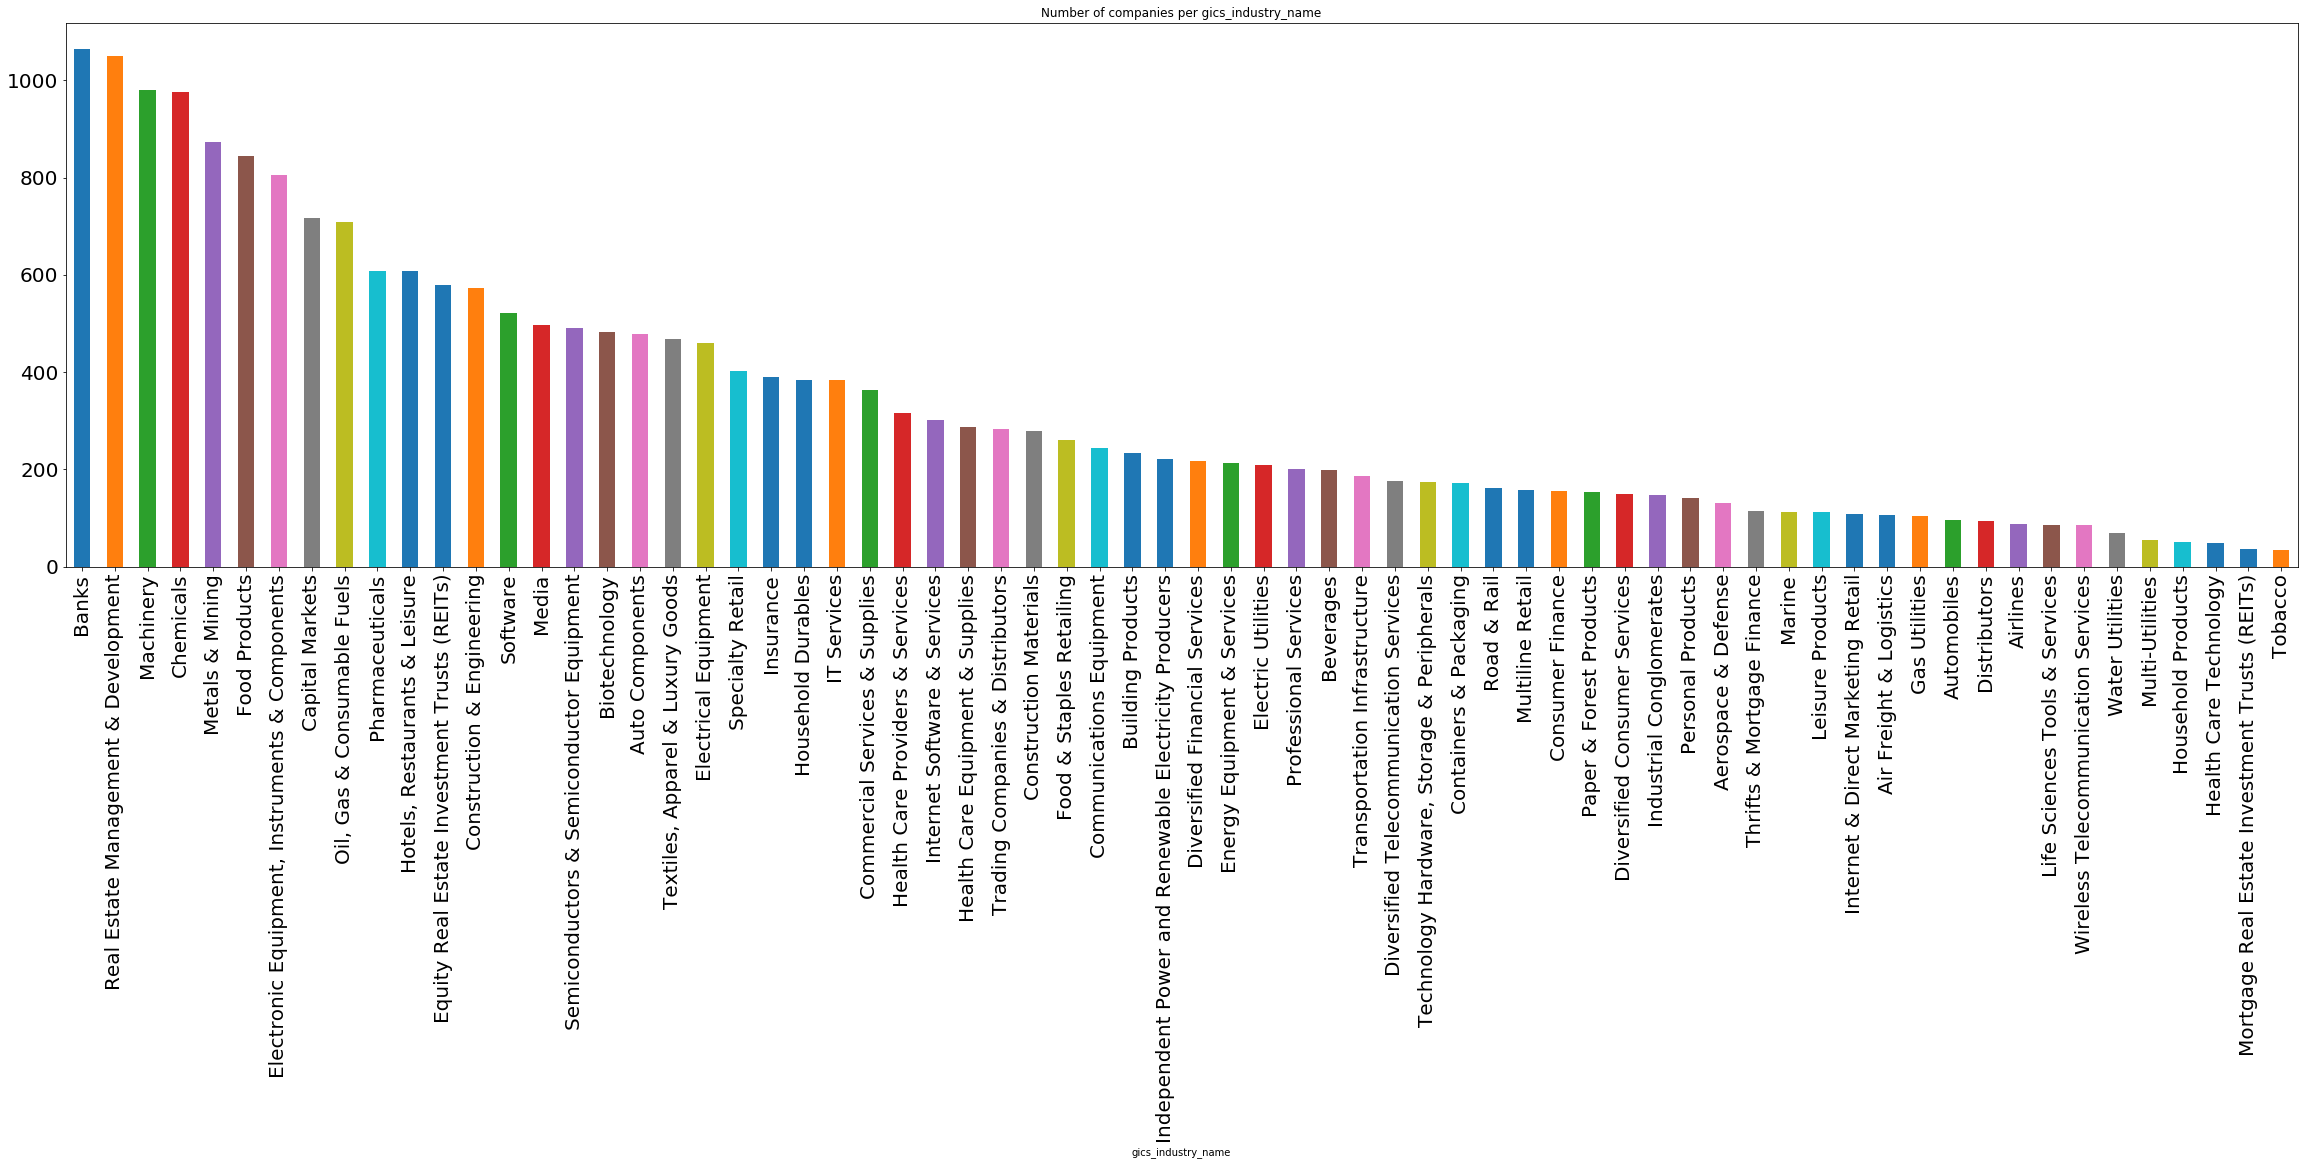


The 20 rarest categories:
                                gics_industry_name  count
48                        Industrial Conglomerates    148
49                               Personal Products    142
50                             Aerospace & Defense    132
51                      Thrifts & Mortgage Finance    115
52                                          Marine    113
53                                Leisure Products    113
54              Internet & Direct Marketing Retail    109
55                         Air Freight & Logistics    106
56                                   Gas Utilities    104
57                                     Automobiles     96
58                                    Distributors     95
59                                        Airlines     87
60                  Life Sciences Tools & Services     86
61             Wireless Telecommunication Services     85
62                                 Water Utilities     69
63                                 Multi-Util

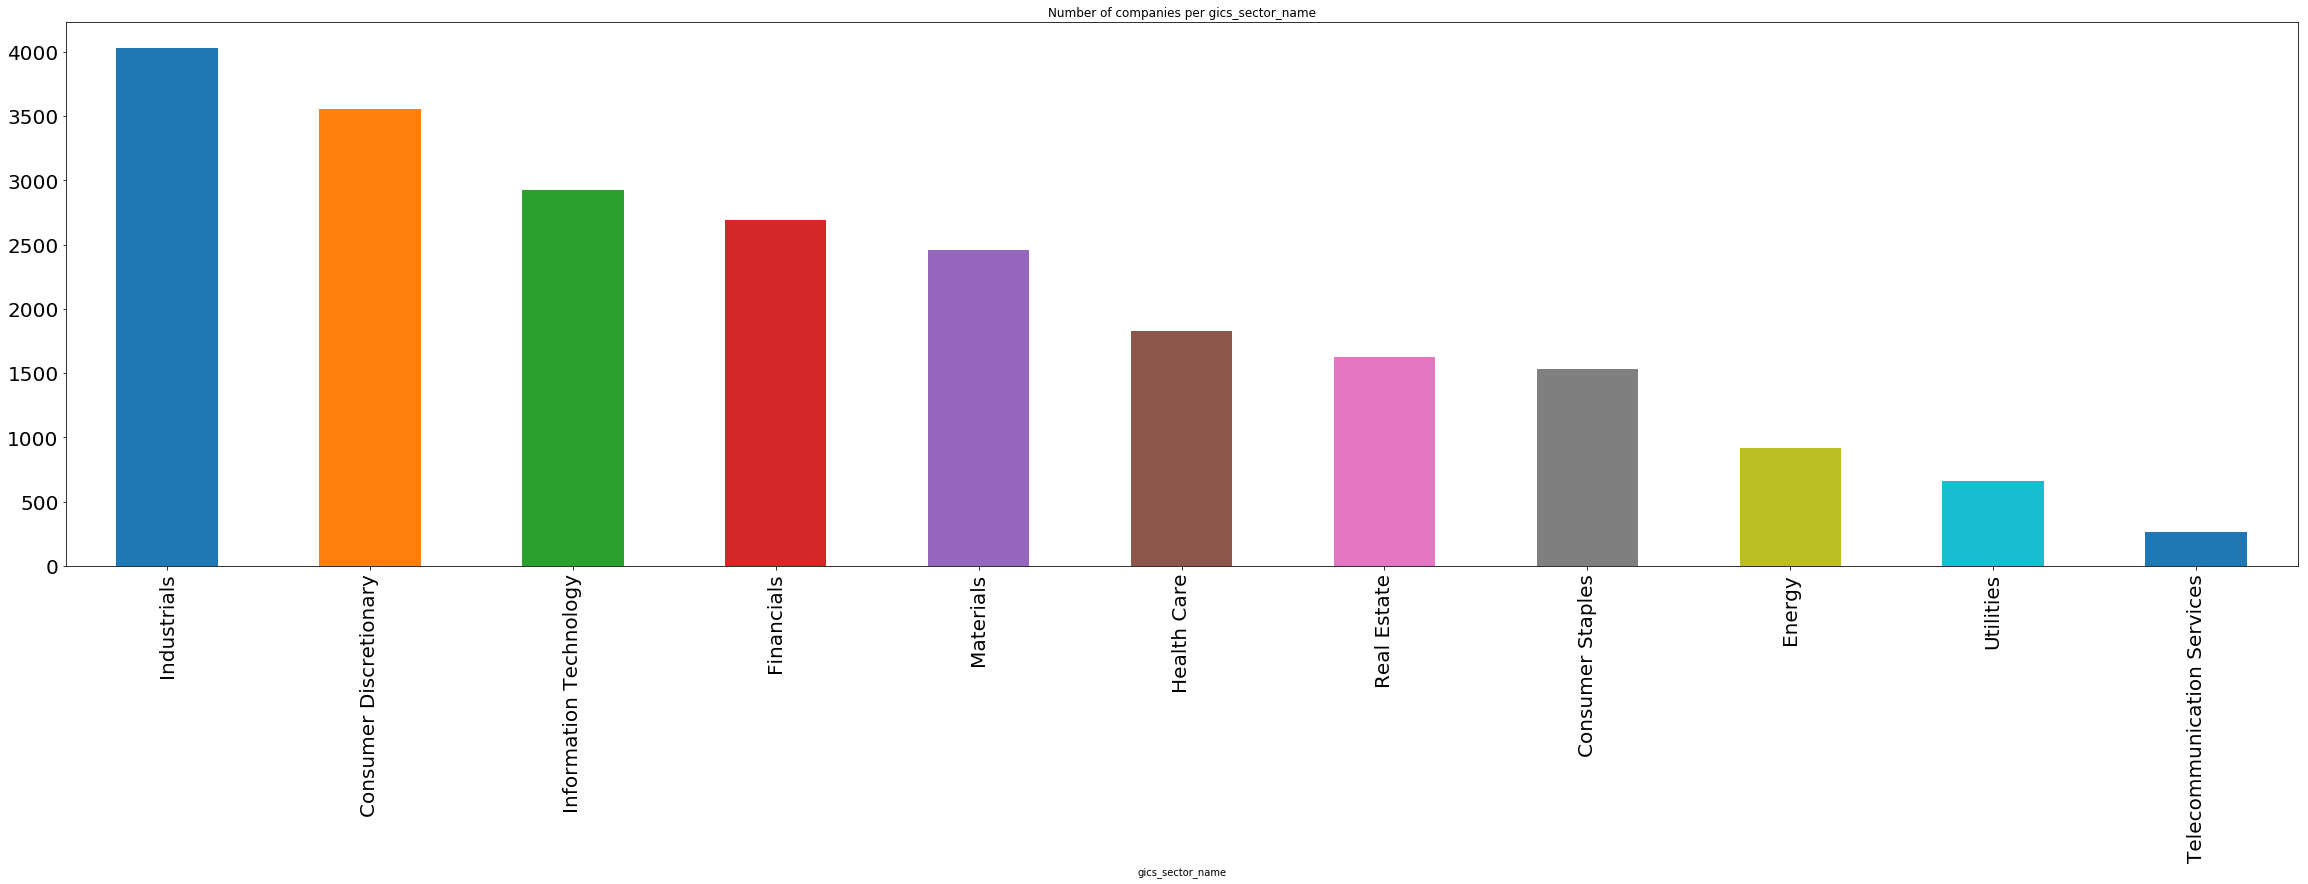


The 20 rarest categories:
              gics_sector_name  count
0                  Industrials   4026
1       Consumer Discretionary   3558
2       Information Technology   2922
3                   Financials   2694
4                    Materials   2457
5                  Health Care   1830
6                  Real Estate   1628
7             Consumer Staples   1529
8                       Energy    921
9                    Utilities    660
10  Telecommunication Services    262

Combining categories with less than 115 examples
Done

Handling outliers in country_of_headquarters column

The frequency of occurence of country_of_headquarters:


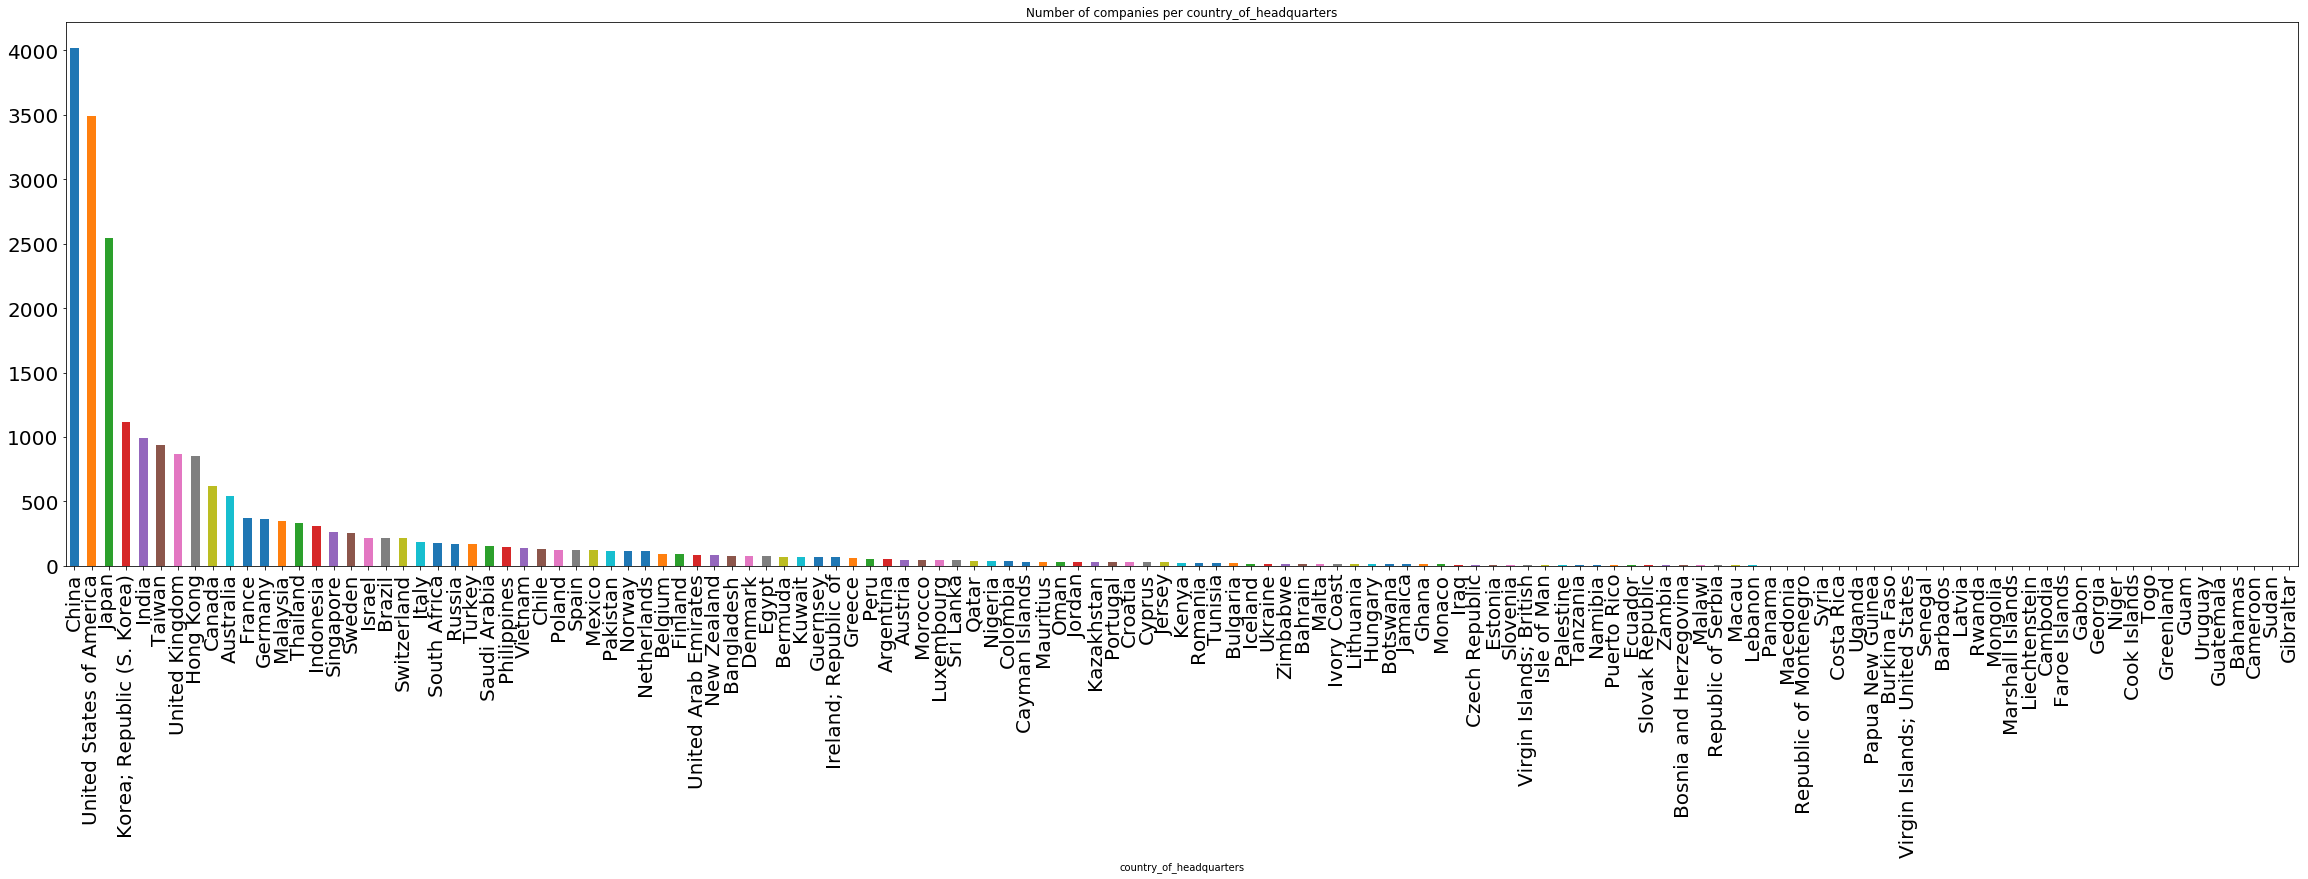


The 20 rarest categories:
    country_of_headquarters  count
109                  Latvia      2
110                  Rwanda      2
111                Mongolia      2
112        Marshall Islands      2
113           Liechtenstein      2
114                Cambodia      1
115           Faroe Islands      1
116                   Gabon      1
117                 Georgia      1
118                   Niger      1
119            Cook Islands      1
120                    Togo      1
121               Greenland      1
122                    Guam      1
123                 Uruguay      1
124               Guatemala      1
125                 Bahamas      1
126                Cameroon      1
127                   Sudan      1
128               Gibraltar      1

Combining categories with less than 115 examples
Done

Handling nulls in gics_industry_name column
Done

Handling nulls in gics_sector_name column
Done

Handling nulls in country_of_headquarters column
Done



In [10]:
handle_categorical_outliers('gics_industry_name', 'rare_industries')
handle_categorical_outliers('gics_sector_name', 'rare_sectors')
handle_categorical_outliers('country_of_headquarters', 'rare_countries')
handle_categorical_nulls('gics_industry_name', 'unknown')
handle_categorical_nulls('gics_sector_name', 'unknown')
handle_categorical_nulls('country_of_headquarters', 'unknown')

In [11]:
def encode_categorical_columns(column_name, decimal_places=2):
    '''
    Set numerical mappings for the categories in the column
    
    Args:
        column_name(str): The categorical column in the DataFrame to consider
        decimal_places(int): The decimal places to round off the probabilities to
    '''
    
    freq = data[column_name].value_counts() / data.shape[0]
    freq = freq.map(lambda x: round(x, decimal_places))
    freq_dict = freq.to_dict()
    data[column_name] = data[column_name].map(freq_dict)

In [12]:
encode_categorical_columns('gics_industry_name')
encode_categorical_columns('gics_sector_name')
encode_categorical_columns('country_of_headquarters')

In [13]:
# Basic numerical columns preprocessing
data['total_revenue'].fillna(data['total_revenue'].median(), inplace=True)
data['bank_total_revenue'].fillna(0, inplace=True)
data['shareholder_income'].fillna(data['shareholder_income'].median(), inplace=True)
data['total_operating_expense'].fillna(data['total_operating_expense'].median(), inplace=True)
data['total_interest_expenses'].fillna(0, inplace=True)
data['capital_expenditures'].fillna(data['capital_expenditures'].median(), inplace=True)
data['total_cash_dividends_paid'].fillna(0, inplace=True)
data['total_receivables_net'].fillna(data['total_receivables_net'].median(), inplace=True)
data['non_interest_expense_bank'].fillna(0, inplace=True)
data['number_of_employees'].fillna(data['number_of_employees'].median(), inplace=True)

In [14]:
data.head()

,company_name,gics_industry_name,gics_sector_name,company_market_cap,total_revenue,bank_total_revenue,shareholder_income,total_operating_expense,total_interest_expenses,capital_expenditures,total_cash_dividends_paid,total_receivables_net,non_interest_expense_bank,country_of_headquarters,number_of_employees
0,Suzano Papel e Celulose SA,0.01,0.11,7.412296e+09,3.176471e+09,0.0,5.457060e+08,2.192834e+09,0.0,-5.375146e+08,-1.722677e+08,8.280034e+08,0.0,0.01,0.0
1,SA Corporate Real Estate Fund Managers Pty Ltd,0.03,0.07,1.032361e+09,1.370199e+08,0.0,1.806121e+08,6.943588e+07,0.0,-8.396334e+07,0.000000e+00,4.796163e+07,0.0,0.01,0.0
2,I&M Holdings Ltd,0.05,0.12,4.897201e+08,2.874332e+08,0.0,7.115000e+07,1.881930e+08,0.0,-9.199267e+06,-1.341476e+07,4.887487e+06,0.0,0.00,0.0
3,Hospitality Property Fund Ltd,0.03,0.07,5.592327e+08,3.716946e+07,0.0,4.057960e+07,4.088094e+06,0.0,-1.140115e+04,0.000000e+00,8.579104e+06,0.0,0.01,0.0
4,Grit Real Estate Income Group Ltd,0.05,0.07,2.806123e+08,2.546171e+07,0.0,1.773169e+07,2.084180e+06,0.0,-1.022260e+06,0.000000e+00,2.635535e+07,0.0,0.00,0.0


## 4. Feature Selection

### 4.1 Importance of numerical columns

Here we plot the graphs that indicate how individual columns
affect the number of employees (along with the regression lines).

In [15]:
numerical_columns = ['company_market_cap', 'total_revenue', 'bank_total_revenue',
                     'shareholder_income', 'total_operating_expense',
                     'total_interest_expenses', 'capital_expenditures',
                     'total_cash_dividends_paid', 'total_receivables_net',
                     'non_interest_expense_bank', 'number_of_employees']

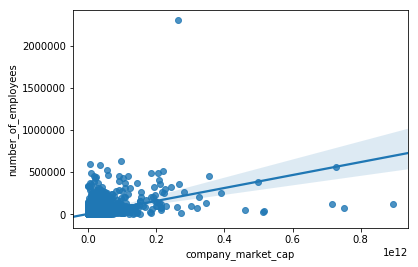

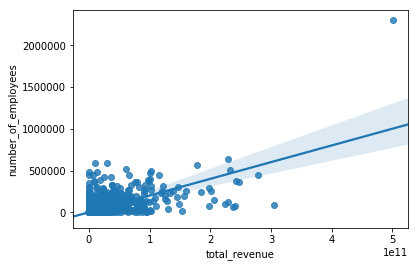

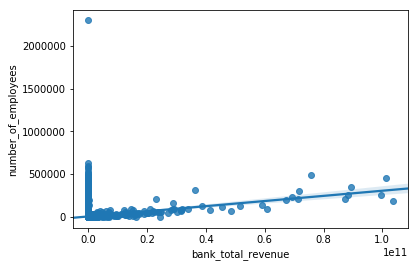

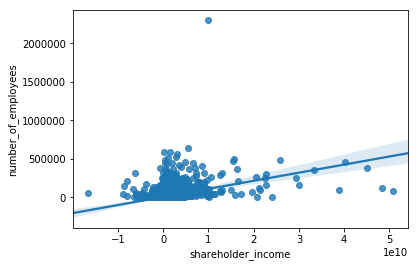

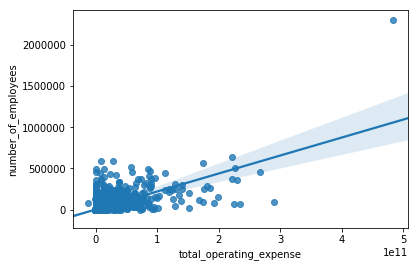

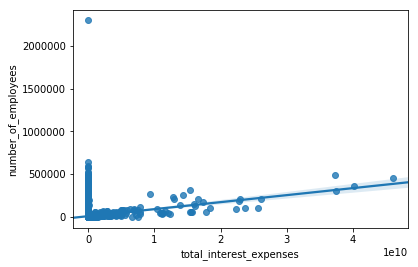

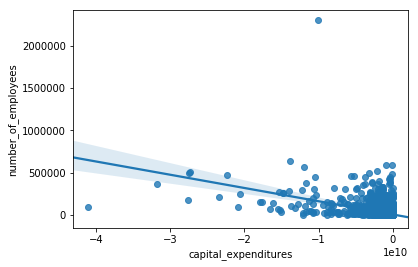

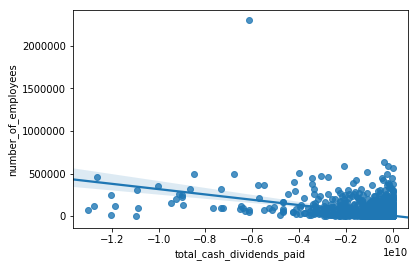

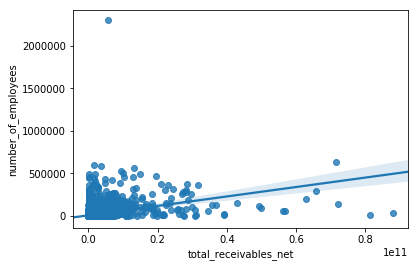

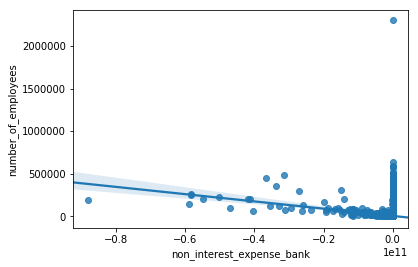

In [16]:
for column in numerical_columns[:-1]:
    
    sns.regplot(x=column, y='number_of_employees', data=data)
    
    plt.show()

From the graphs it can be seen that all the numerical columns affect
the number of employees, but the datapoints are concentrated in
one side of the plot, indicating that a near-perfect regression line
may not be possible

### 4.1 Importance of categorical columns

Here we plot histograms that indicate how individual columns
affect the number of employees.

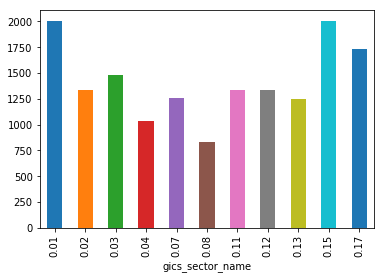

In [17]:
data.groupby('gics_sector_name')['number_of_employees'].median().plot(kind='bar')

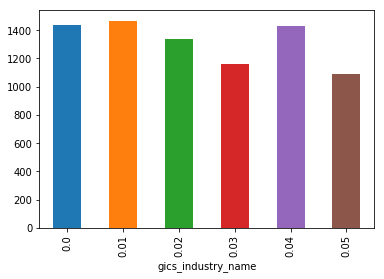

In [18]:
data.groupby('gics_industry_name')['number_of_employees'].median().plot(kind='bar')

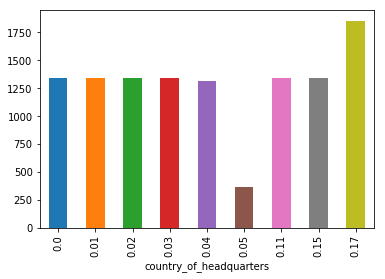

In [19]:
data.groupby('country_of_headquarters')['number_of_employees'].median().plot(kind='bar')

From the plots, it can be observed that the `gics_sector_name` column
has more influence on the number of employees in a company than
the other categorical columns.

## 5. Machine Learning

In [20]:
from time import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 5.1 Data Preparation

In [21]:
columns_to_consider = ['gics_industry_name', 'gics_sector_name',
                       'company_market_cap', 'total_revenue',
                       'bank_total_revenue', 'shareholder_income',
                       'total_operating_expense', 'total_interest_expenses',
                       'capital_expenditures', 'total_cash_dividends_paid',
                       'total_receivables_net', 'non_interest_expense_bank',
                       'country_of_headquarters']

X = data[columns_to_consider].values
y = data['number_of_employees'].values

scaler = StandardScaler()
X = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [23]:
def coeff_determination(y_true, y_pred):
    res = K.sum(K.square(y_true - y_pred))
    tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - res / (tot + K.epsilon())

In [24]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)
metrics = ['mse', 'mae', 'mape', coeff_determination]

### 5.2 Neural Network

In [25]:
nn = Sequential()
nn.add(Dense(30, input_dim=13, activation='relu'))
nn.add(Dropout(0.8))
nn.add(Dense(50, activation='relu'))
nn.add(Dropout(0.8))
nn.add(Dense(1, activation='linear'))

nn.compile(loss='mse', optimizer=optimizer, metrics=metrics)

start_time = time()
nn_history = nn.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
print('Took {} seconds.'.format(round(time() - start_time)))

nn_score = nn.evaluate(X_test, y_test, batch_size=64)

Took 81 seconds.
7602/7602 [==============================] - 0s 25us/step


In [26]:
print('Mean Squared Error: {}'.format(nn_score[1]))
print('Mean Absolute Error: {}'.format(nn_score[2]))
print('Mean Absolute Percentage Error: {}'.format(nn_score[3]))
print('Coefficient of Determination: {}'.format(nn_score[4]))

Mean Squared Error: 349076489.5217048
Mean Absolute Error: 5126.826082209041
Mean Absolute Percentage Error: 33755934346.316822
Coefficient of Determination: 0.2537662765754583


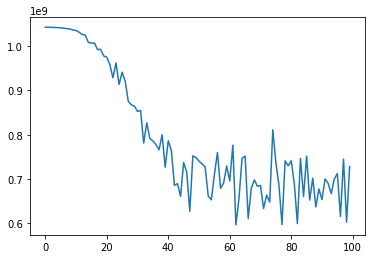

In [27]:
plt.plot(nn_history.history['loss'])

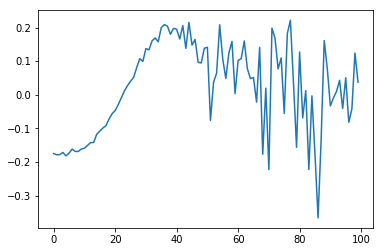

In [28]:
plt.plot(nn_history.history['coeff_determination'])

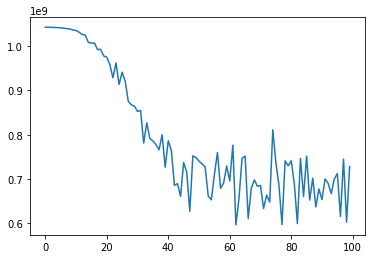

In [29]:
plt.plot(nn_history.history['mean_squared_error'])

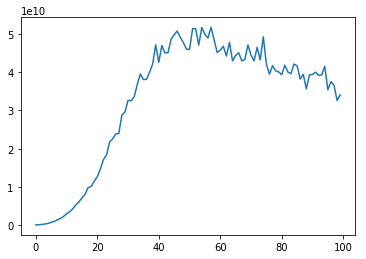

In [30]:
plt.plot(nn_history.history['mean_absolute_percentage_error'])

### 5.3 Possible optimizations

Better performance can be obtained by

- Increasing the number of epochs
- Decreasing the learning rate
- Adding a decay rate

## 6. Conclusion

In this project,

1. The data was imported and preprocessed to remove nulls and outliers.
2. Feature selection was performed using intuitive visualizations.
3. A machine learning model was developed to predict the number of employees based on other data.